In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy import optimize
import re
import matplotlib.pyplot as plt
import utils
grader = utils.Grader()
%matplotlib inline

In [ ]:
data = loadmat("ex6data1.mat")
X, y = data['X'], data['y'][:,0]
x_pos = y==1
x_neg = y==0

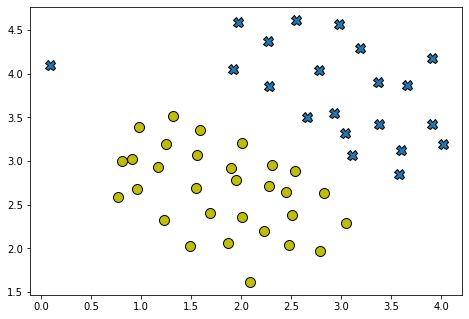

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(X[x_pos, 0], X[x_pos, 1], 'X', mew=1, ms=10, mec='k')
axes.plot(X[x_neg, 0], X[x_neg, 1], 'o', mew=1, mfc='y', ms=10, mec='k')
axes.grid(False)

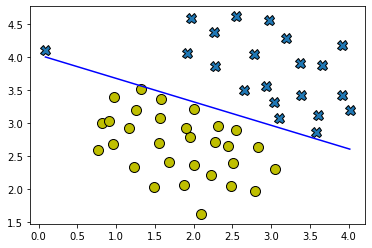

In [ ]:
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 50

model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)

In [ ]:
def gaussianKernel(x1, x2, sigma):
    """
    Computes the radial basis function
    Returns a radial basis function kernel between x1 and x2.
    
    Parameters
    ----------
    x1 :  numpy ndarray
        A vector of size (n, ), representing the first datapoint.
    
    x2 : numpy ndarray
        A vector of size (n, ), representing the second datapoint.
    
    sigma : float
        The bandwidth parameter for the Gaussian kernel.

    Returns
    -------
    sim : float
        The computed RBF between the two provided data points.
    
    Instructions
    ------------
    Fill in this function to return the similarity between `x1` and `x2`
    computed using a Gaussian kernel with bandwidth `sigma`.
    """
    sim = 0
    sim = np.exp(-(np.sum((x1-x2)**2))/(2*(sigma**2)))
    return sim

In [ ]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = %0.2f:'
      '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))

Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



In [ ]:
grader[1] = gaussianKernel
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Login (email address): deepesh.1905g2@gmail.com
Token: QzgXuTm2qTPtDuZz
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                   Email Feature Extraction |  25 /  25 | Nice work!
                            Gaussian Kernel |   0 /  25 | Your answer is incorrect.
        Parameters (C, sigma) for Dataset 3 |   0 /  25 | Your answer is incorrect.
                           Email Processing |   0 /  25 | Your answer is incorrect.
                                  --------------------------------
                                            |  25 / 100 |  



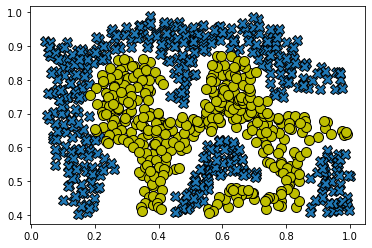

In [ ]:
# Load from ex6data2
# You will have X, y as keys in the dict data
data = loadmat('ex6data2.mat')
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

In [ ]:
def plotData(X, y, grid=False):
    """
    Plots the data points X and y into a new figure. Uses `+` for positive examples, and `o` for
    negative examples. `X` is assumed to be a Mx2 matrix

    Parameters
    ----------
    X : numpy ndarray
        X is assumed to be a Mx2 matrix.

    y : numpy ndarray
        The data labels.

    grid : bool (Optional)
        Specify whether or not to show the grid in the plot. It is False by default.

    Notes
    -----
    This was slightly modified such that it expects y=1 or y=0.
    """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    plt.plot(X[pos, 0], X[pos, 1], 'X', mew=1, ms=10, mec='k')
    plt.plot(X[neg, 0], X[neg, 1], 'o', mew=1, mfc='y', ms=10, mec='k')
    plt.grid(grid)

In [ ]:
def visualizeBoundary(X, y, model):
    """
    Plots a non-linear decision boundary learned by the SVM and overlays the data on it.

    Parameters
    ----------
    X : array_like
        (m x 2) The training data with two features (to plot in a 2-D plane).

    y : array_like
        (m, ) The data labels.

    model : dict
        Dictionary of model variables learned by SVM.
    """
    plotData(X, y)

    # make classification predictions over a grid of values
    x1plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    x2plot = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
    X1, X2 = np.meshgrid(x1plot, x2plot)

    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        this_X = np.stack((X1[:, i], X2[:, i]), axis=1)
        vals[:, i] = utils.svmPredict(model, this_X)

    plt.contour(X1, X2, vals, colors='y', linewidths=2)
    plt.pcolormesh(X1, X2, vals, cmap='YlGnBu', alpha=0.25, edgecolors='None', lw=0)
    plt.grid(False)

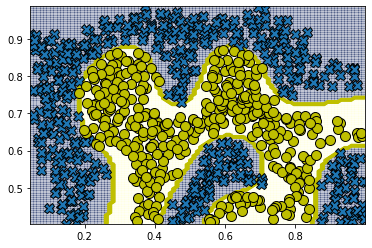

In [ ]:
# SVM Parameters
C = 1
sigma = 0.1

model= utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
visualizeBoundary(X, y, model)

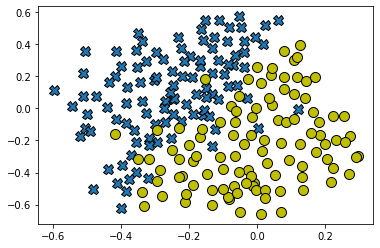

In [ ]:
# Load from ex6data3
# You will have X, y, Xval, yval as keys in the dict data
data = loadmat('ex6data3.mat')
X, y, Xval, yval = data['X'], data['y'][:, 0], data['Xval'], data['yval'][:, 0]

# Plot training data
utils.plotData(X, y)

In [ ]:
def dataset3Params(X, y, Xval, yval):
    """
    Returns your choice of C and sigma for Part 3 of the exercise 
    where you select the optimal (C, sigma) learning parameters to use for SVM
    with RBF kernel.
    
    Parameters
    ----------
    X : array_like
        (m x n) matrix of training data where m is number of training examples, and 
        n is the number of features.
    
    y : array_like
        (m, ) vector of labels for ther training data.
    
    Xval : array_like
        (mv x n) matrix of validation data where mv is the number of validation examples
        and n is the number of features
    
    yval : array_like
        (mv, ) vector of labels for the validation data.
    
    Returns
    -------
    C, sigma : float, float
        The best performing values for the regularization parameter C and 
        RBF parameter sigma.
    
    Instructions
    ------------
    Fill in this function to return the optimal C and sigma learning 
    parameters found using the cross validation set.
    You can use `svmPredict` to predict the labels on the cross
    validation set. For example, 
    
        predictions = utils.svmPredict(model, Xval)

    will return the predictions on the cross validation set.
    
    Note
    ----
    You can compute the prediction error using 
    
        np.mean(predictions != yval)
    """
    # You need to return the following variables correctly.
    C = 1
    sigma = 0.3
    C_values = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    sigma_values = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    res_arr = np.zeros([C_values.size, sigma_values.size])

    for i in np.arange(C_values.size):
        for j in np.arange(sigma_values.size):
            model= utils.svmTrain(X, y, C_values[i], gaussianKernel, args=(sigma_values[j],))
            predictions = utils.svmPredict(model, Xval)
            pred_error = np.mean(predictions != yval)
            
            res_arr[i, j] = pred_error
    ind = np.unravel_index(np.argmin(res_arr, axis = None), res_arr.shape)
    C = C_values[ind[0]]
    sigma = sigma_values[ind[1]]
    return C, sigma

1.0 0.1


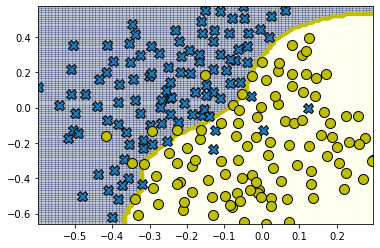

In [ ]:
# Try different SVM Parameters here
C, sigma = dataset3Params(X, y, Xval, yval)

# Train the SVM
# model = utils.svmTrain(X, y, C, lambda x1, x2: gaussianKernel(x1, x2, sigma))
model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)
print(C, sigma)

In [ ]:
grader[2] = lambda : (C, sigma)
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                   Email Feature Extraction |  25 /  25 | Nice work!
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |   0 /  25 | Your answer is incorrect.
                           Email Processing |   0 /  25 | Your answer is incorrect.
                                  --------------------------------
                                            |  50 / 100 |  



In [ ]:
def getVocabList():
    """
    Reads the fixed vocabulary list in vocab.txt and returns a cell array of the words
    %   vocabList = GETVOCABLIST() reads the fixed vocabulary list in vocab.txt
    %   and returns a cell array of the words in vocabList.

    :return:
    """
    vocabList = np.genfromtxt(('vocab.txt'), dtype=object)
    return list(vocabList[:, 1].astype(str))


In [ ]:
def processEmail(email_contents, verbose=True):
    """
    Preprocesses the body of an email and returns a list of indices 
    of the words contained in the email.    
    
    Parameters
    ----------
    email_contents : str
        A string containing one email. 
    
    verbose : bool
        If True, print the resulting email after processing.
    
    Returns
    -------
    word_indices : list
        A list of integers containing the index of each word in the 
        email which is also present in the vocabulary.
    
    Instructions
    ------------
    Fill in this function to add the index of word to word_indices 
    if it is in the vocabulary. At this point of the code, you have 
    a stemmed word from the email in the variable word.
    You should look up word in the vocabulary list (vocabList). 
    If a match exists, you should add the index of the word to the word_indices
    list. Concretely, if word = 'action', then you should
    look up the vocabulary list to find where in vocabList
    'action' appears. For example, if vocabList[18] =
    'action', then, you should add 18 to the word_indices 
    vector (e.g., word_indices.append(18)).
    
    Notes
    -----
    - vocabList[idx] returns a the word with index idx in the vocabulary list.
    
    - vocabList.index(word) return index of word `word` in the vocabulary list.
      (A ValueError exception is raised if the word does not exist.)
    """
    # Load Vocabulary
    vocabList = getVocabList()

    # Init return value
    word_indices = []

    # ========================== Preprocess Email ===========================
    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers
    # hdrstart = email_contents.find(chr(10) + chr(10))
    # email_contents = email_contents[hdrstart:]

    # Lower case
    email_contents = email_contents.lower()
    
    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents =re.compile('<[^<>]+>').sub(' ', email_contents)

    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.compile('[0-9]+').sub(' number ', email_contents)

    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.compile('(http|https)://[^\s]*').sub(' httpaddr ', email_contents)

    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.compile('[^\s]+@[^\s]+').sub(' emailaddr ', email_contents)
    
    # Handle $ sign
    email_contents = re.compile('[$]+').sub(' dollar ', email_contents)
    
    # get rid of any punctuation
    email_contents = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', email_contents)

    # remove any empty word string
    email_contents = [word for word in email_contents if len(word) > 0]
    
    # Stem the email contents word by word
    stemmer = utils.PorterStemmer()
    processed_email = []
    for word in email_contents:
        # Remove any remaining non alphanumeric characters in word
        word = re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        word = stemmer.stem(word)
        processed_email.append(word)

        if len(word) < 1:
            continue
        try:
            word_indices.append(vocabList.index(word))
        except ValueError:
            pass

    if verbose:
        print('----------------')
        print('Processed email:')
        print('----------------')
        print(' '.join(processed_email))
    return word_indices

In [ ]:
#  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
#  to convert each email into a vector of features. In this part, you will
#  implement the preprocessing steps for each email. You should
#  complete the code in processEmail.m to produce a word indices vector
#  for a given email.

# Extract Features
with open('emailSample1.txt') as fid:
    file_contents = fid.read()

word_indices  = processEmail(file_contents)

#Print Stats
print('-------------')
print('Word Indices:')
print('-------------')
print(word_indices)

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
-------------
Word Indices:
-------------
[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1894, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 476, 1119, 1892, 1509, 798, 1181, 1236, 511, 1119, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]


In [ ]:
grader[3] = processEmail
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): n
Login (email address): deepesh.1905g2@gmail.com
Token: LVeJ9hsyVZyIhwAJ
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                   Email Feature Extraction |  25 /  25 | Nice work!
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |  25 /  25 | Nice work!
                           Email Processing |   0 /  25 | Your answer is incorrect.
                                  --------------------------------
                                            |  75 / 100 |  



In [ ]:
def emailFeatures(word_indices):
    """
    Takes in a word_indices vector and produces a feature vector from the word indices. 
    
    Parameters
    ----------
    word_indices : list
        A list of word indices from the vocabulary list.
    
    Returns
    -------
    x : list 
        The computed feature vector.
    
    Instructions
    ------------
    Fill in this function to return a feature vector for the
    given email (word_indices). To help make it easier to  process 
    the emails, we have have already pre-processed each email and converted
    each word in the email into an index in a fixed dictionary (of 1899 words).
    The variable `word_indices` contains the list of indices of the words 
    which occur in one email.
    
    Concretely, if an email has the text:

        The quick brown fox jumped over the lazy dog.

    Then, the word_indices vector for this text might look  like:
               
        60  100   33   44   10     53  60  58   5

    where, we have mapped each word onto a number, for example:

        the   -- 60
        quick -- 100
        ...

    Note
    ----
    The above numbers are just an example and are not the actual mappings.

    Your task is take one such `word_indices` vector and construct
    a binary feature vector that indicates whether a particular
    word occurs in the email. That is, x[i] = 1 when word i
    is present in the email. Concretely, if the word 'the' (say,
    index 60) appears in the email, then x[60] = 1. The feature
    vector should look like:
        x = [ 0 0 0 0 1 0 0 0 ... 0 0 0 0 1 ... 0 0 0 1 0 ..]
    """
    # Total number of words in the dictionary
    n = 1899

    # You need to return the following variables correctly.
    x = np.zeros(n)

    x[word_indices] = 1
    
    return x

In [ ]:
# Extract Features
with open('emailSample1.txt') as fid:
    file_contents = fid.read()

word_indices  = processEmail(file_contents)
features      = emailFeatures(word_indices)

# Print Stats
print('\nLength of feature vector: %d' % len(features))
print('Number of non-zero entries: %d' % sum(features > 0))

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr

Length of feature vector: 1899
Number of non-zero entries: 45


In [ ]:
grader[4] = emailFeatures
grader.grade()


Submitting Solutions | Programming Exercise support-vector-machines

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                   Email Feature Extraction |  25 /  25 | Nice work!
                            Gaussian Kernel |  25 /  25 | Nice work!
        Parameters (C, sigma) for Dataset 3 |  25 /  25 | Nice work!
                           Email Processing |  25 /  25 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  



In [ ]:
# Load the Spam Email dataset
# You will have X, y in your environment
data = loadmat('spamTrain.mat')
X, y= data['X'].astype(float), data['y'][:, 0]
print('Training Linear SVM (Spam Classification)')
print('This may take 1 to 2 minutes ...\n')

C = 0.1
model = utils.svmTrain(X, y, C, utils.linearKernel)

Training Linear SVM (Spam Classification)
This may take 1 to 2 minutes ...



In [ ]:
# Compute the training accuracy
p = utils.svmPredict(model, X)

print('Training Accuracy: %.2f' % (np.mean(p == y) * 100))

Training Accuracy: 99.85


In [ ]:
# Load the test dataset
# You will have Xtest, ytest in your environment
data = loadmat('spamTest.mat')
Xtest, ytest = data['Xtest'].astype(float), data['ytest'][:, 0]

print('Evaluating the trained Linear SVM on a test set ...')
p = utils.svmPredict(model, Xtest)

print('Test Accuracy: %.2f' % (np.mean(p == ytest) * 100))

Evaluating the trained Linear SVM on a test set ...
Test Accuracy: 98.90


In [ ]:
# Sort the weights and obtin the vocabulary list
# NOTE some words have the same weights, 
# so their order might be different than in the text above
idx = np.argsort(model['w'])
top_idx = idx[-15:][::-1]
vocabList = getVocabList()

print('Top predictors of spam:')
print('%-15s %-15s' % ('word', 'weight'))
print('----' + ' '*12 + '------')
for word, w in zip(np.array(vocabList)[top_idx], model['w'][top_idx]):
    print('%-15s %0.2f' % (word, w))

Top predictors of spam:
word            weight         
----            ------
our             0.49
click           0.47
remov           0.42
guarante        0.39
visit           0.37
basenumb        0.34
dollar          0.32
will            0.27
price           0.26
pleas           0.26
nbsp            0.26
lo              0.25
most            0.25
ga              0.24
hour            0.24


In [ ]:
filename = 'emailSample1.txt'

with open(filename) as fid:
    file_contents = fid.read()

word_indices = processEmail(file_contents, verbose=False)
x = emailFeatures(word_indices)
p = utils.svmPredict(model, x)

print('\nProcessed %s\nSpam Classification: %s' % (filename, 'spam' if p else 'not spam'))


Processed emailSample1.txt
Spam Classification: not spam
